# Evaluation Notebook

## Evaluate Results

Previous evaluation steps dealt with factors such as the accuracy and generality of the model. This step assesses the degree to which the model meets the business objectives and seeks to determine if there is some business reason why this model is deficient. 

Moreover, evaluation also assesses other data mining results generated. Data mining results involve models that are necessarily related to the original business objectives and all other findings that are not necessarily related to the original business objectives, but might also unveil additional challenges, information, or hints for future directions.

### Outputs

<b>1. Assessment of data mining results with respect to business success criteria</b>
- Summarize assessment results in terms of business success criteria, including a final statement regarding whether the project already meets the initial business objectives.

<b>2. Approved models</b>
- After assessing models with respect to business success criteria, the generated models that meet the selected criteria become the approved models.

## Review Process

At this point, the resulting models appear to be satisfactory and to satisfy business needs. It is now appropriate to do a more thorough review of the data mining engagement in order to determine if there is any important factor or task that has somehow been overlooked. This review also covers quality assurance issues—for example: Did we correctly build the model? Did we use only the attributes that we are allowed to use and that are available for future analyses?

### Outputs

<b>3. Review of Process</b>
- Summarize the process review and highlight activities that have been missed and those that should be repeated.

## Determine Next Steps

Depending on the results of the assessment and the process review, the project team decides how to proceed. The team decides whether to finish this project and move on to deployment, initiate further iterations, or set up new data mining projects. This task includes analyses of remaining resources and budget, which may influence the decisions.

### Outputs

<b>4. List of possible actions</b>
- List the potential further actions, along with the reasons for and against each option.

<b>5. Decision</b>
- Describe the decision as to how to proceed, along with the rationale.

## Code Base Update

### Outputs

<b>6. Update code base</b>
- Update code base with any new functions/classes which haven't been implemented yet. I.e. a new preprocessing function or a new visualization technique
- Suggest further improvements to functions/classes within code base

## Final Model

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import lightgbm as lgb
import joblib
from sklearn.model_selection import train_test_split
src_path = os.path.abspath('../src/')
sys.path.append(src_path)
from data_modeling import *
from data_cleaning import *
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
SEED = 123

### Import and Clean the Data

In [2]:
# Import and clean the data
tr_trans_path = '../data/raw/new/train_transaction.csv'
tr_id_path = '../data/raw/new/train_identity.csv'
ts_trans_path = '../data/raw/new/test_transaction.csv'
ts_id_path = '../data/raw/new/test_identity.csv'
train_df, test_df = ngv_train_test_data_processor(tr_trans_path, tr_id_path,
                                                  ts_trans_path, ts_id_path)
# train_trans_df, train_id_df, test_trans_df, test_id_df = ngv_train_test_data_processor(tr_trans_path, tr_id_path,
#                                                   ts_trans_path, ts_id_path)

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
# temp_ts = pd.read_csv(ts_id_path)
# temp_tr = pd.read_csv(tr_id_path)

In [4]:
# temp_ts['variable'] = temp_ts['variable'].apply(lambda x: x.replace("-", "_"))

In [5]:
# temp_tr.variable.value_counts()

In [6]:
# temp[['TransactionID', 'variable', 'value']].head()

In [7]:
# temp_ts.to_csv(ts_id_path, index=False)

In [8]:
# temp.shape

In [9]:
# sum(temp.index == temp['Unnamed: 0'])

In [10]:
# train_id_df.head()

In [11]:
# test_id_df.head()

In [12]:
# print(train_trans_df.loc[train_trans_df.index.isin(train_id_df.index)].shape[0])
# print(train_trans_df.loc[train_trans_df.index.isin(test_id_df.index)].shape[0])
# print(test_trans_df.loc[test_trans_df.index.isin(train_id_df.index)].shape[0])
# print(test_trans_df.loc[test_trans_df.index.isin(test_id_df.index)].shape[0])

In [13]:
# The difference in number of columns is because of the target in the training data only
print(train_df.shape)
print(test_df.shape)

(590540, 441)
(506691, 440)


### Encode Categorical Data

In [14]:
num_cats = ['card1', 'card2', 'card3', 'card5',
            'addr1', 'addr2', 'id_13', 'id_14',
            'id_17', 'id_18', 'id_19', 'id_20',
            'id_21', 'id_22', 'id_24', 'id_25',
            'id_26', 'id_32', 'id_33_prod', 'id_33_ratio']
freq_cats = ['DeviceInfo', 'DeviceInfo_trunc',
             'DeviceInfo_alpha_trunc', 'id_30',
             'id_31', 'id_31_bin_many', 'id_33']
label_cats = ['productcd', 'card4', 'card6', 'm4',
              'p_emaildomain', 'r_emaildomain',
              'id_15', 'id_23', 'id_30_name',
              'id_31_bin_few']
cat_feats = num_cats + freq_cats + label_cats

In [15]:
# had to make a custom encoder to properly handle NaNs
encoder_map = ngv_ord_encode_fit(cat_feats, train_df)
# encode_na = True would make NaNs their own category vs. just being ignored as NaNs
train_df = ngv_ord_encode_transform(encoder_map, train_df, encode_na=False)
test_df = ngv_ord_encode_transform(encoder_map, test_df, encode_na=False)

### Downcast Number Data Types

In [16]:
# reducing memory and downcasting numerical datatypes
# this takes a long time
for col in train_df.columns:
    train_df[col] = ngv_float_to_int(train_df[col])
    
for col in test_df.columns:
    test_df[col] = ngv_float_to_int(test_df[col])

In [17]:
print(train_df.shape)
print(test_df.shape)

(590540, 441)
(506691, 440)


In [18]:
# test_df.DeviceInfo_trunc.value_counts()

In [19]:
# temp = pd.read_csv('../data/raw/test_identity.csv', low_memory=False)

In [20]:
# temp.head()

### Save Final Data for Convenience

In [21]:
data_path = '../data/interim/new/'
train_df_pickle = 'ngv_training_model_ready.pkl'
test_df_pickle = 'ngv_testing_model_ready.pkl'


In [22]:
# writing pickles
train_df.to_pickle(data_path + train_df_pickle)
test_df.to_pickle(data_path + test_df_pickle)

In [23]:
# loading pickles
# train_df = pd.read_pickle(data_path + train_df_pickle)
# test_df = pd.read_pickle(data_path + test_df_pickle)

In [24]:
y_train = train_df['isfraud'].values
X_train = train_df.drop(['isfraud'], axis=1)
X_test = test_df

In [25]:
X_train.shape

(590540, 440)

### Manually Drop Features Observed as Highly Correlated or Unimportant

In [26]:
not_model_cols = ['transactiondt']

In [27]:
unimportant_feats = ['v252', 'id_35', 'v175', 'v194', 'v121',
                     'v173', 'v334', 'v196', 'v112', 'v141',
                     'DeviceInfo_alpha_trunc', 'v111', 'id_17',
                     'v138', 'v327', 'v240', 'id_31', 'id_26',
                     'id_30', 'id_27', 'v113', 'v1', 'v269',
                     'v122', 'v14', 'v41', 'v120', 'v142', 'v65',
                     'card4', 'v117', 'v88', 'v118', 'addr2',
                     'id_31_bin_many', 'v241', 'v89', 'v28',
                     'v119', 'v325', 'id_24', 'v107', 'v68',
                     'v305', 'id_14', 'id_22', 'v328', 'id_25',
                     'id_30_name', 'id_33_ratio']

In [28]:
v_drops_95 = ['v10', 'v102', 'v106', 'v126', 'v127', 'v128',
              'v132', 'v133', 'v134', 'v143', 'v144', 'v145',
              'v148', 'v149', 'v15', 'v150', 'v151', 'v153',
              'v155', 'v157', 'v162', 'v167', 'v168', 'v17',
              'v177', 'v178', 'v179', 'v190', 'v191', 'v192',
              'v193', 'v202', 'v203', 'v204', 'v21', 'v212',
              'v213', 'v217', 'v218', 'v219', 'v221', 'v225',
              'v231', 'v232', 'v233', 'v237', 'v242', 'v248',
              'v249', 'v250', 'v254', 'v255', 'v266', 'v27',
              'v271', 'v272', 'v279', 'v280', 'v29', 'v292',
              'v294', 'v299', 'v302', 'v306', 'v307', 'v308',
              'v31', 'v316', 'v317', 'v318', 'v324', 'v329',
              'v33', 'v330', 'v331', 'v332', 'v333', 'v34',
              'v42', 'v48',  'v51', 'v57', 'v59', 'v69',
              'v71', 'v74',  'v80', 'v90', 'v92', 'v95',
              'v96', 'v97']

In [29]:
all_drops = not_model_cols + unimportant_feats + v_drops_95

In [30]:
X_train = X_train.drop(all_drops, axis=1)
X_test = X_test.drop(all_drops, axis=1)

### Final Modeling and Results

In [31]:
params = {
             'objective': 'binary',
             'boosting': 'gbdt',
             'n_jobs': -1,            
             'learning_rate': 0.02,
             'verbose': 0,
             'num_leaves': 2**8,
             'bagging_fraction': 0.95,
             'bagging_freq': 1,
             'bagging_seed': 1,
             'feature_fraction': 0.9,
             'feature_fraction_seed': 1,
             'max_bin': 256,
             'num_iterations': 100000,
             'early_stopping_rounds': 100,
             'metric': 'auc',
             'seed': SEED
    }
feats = X_train.columns.to_list()
cats = set(cat_feats).difference(set(all_drops))

In [32]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size = 0.2,
                                            stratify = y_train,
                                            random_state = SEED)

In [33]:
lgb_classifier = lgb.LGBMClassifier(**params)

In [34]:
lgb_classifier.fit(X = X_tr, y = y_tr,
                   feature_name = feats, categorical_feature = cats,
                   eval_set = [(X_val, y_val)], verbose = 100)

C:\tools\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\tools\Anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\tools\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['DeviceInfo', 'DeviceInfo_trunc', 'addr1', 'card1', 'card2', 'card3', 'card5', 'card6', 'id_13', 'id_15', 'id_18', 'id_19', 'id_20', 'id_21', 'id_23', 'id_31_bin_few', 'id_32', 'id_33', 'id_33_prod', 'm4', 'p_emaildomain', 'productcd', 'r_emaildomain']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.951875
[200]	valid_0's auc: 0.965052
[300]	valid_0's auc: 0.970902
[400]	valid_0's auc: 0.973706
[500]	valid_0's auc: 0.975232
[600]	valid_0's auc: 0.976178
[700]	valid_0's auc: 0.976884
[800]	valid_0's auc: 0.977269
[900]	valid_0's auc: 0.977538
[1000]	valid_0's auc: 0.977745
[1100]	valid_0's auc: 0.977947
[1200]	valid_0's auc: 0.978026
[1300]	valid_0's auc: 0.97814
[1400]	valid_0's auc: 0.978227
[1500]	valid_0's auc: 0.978225
Early stopping, best iteration is:
[1474]	valid_0's auc: 0.978264


LGBMClassifier(bagging_fraction=0.95, bagging_freq=1, bagging_seed=1,
               boosting='gbdt', early_stopping_rounds=100, feature_fraction=0.9,
               feature_fraction_seed=1, learning_rate=0.02, max_bin=256,
               metric='auc', num_iterations=100000, num_leaves=256,
               objective='binary', seed=123, verbose=0)

In [35]:
model_path = '../data/new_mdl/ngv_lgb_model.pkl'
# save model
joblib.dump(lgb_classifier, model_path)
# load model
#lgb_classifier = joblib.load(model_path)

['../data/new_mdl/ngv_lgb_model.pkl']

In [36]:
y_tr_pred = lgb_classifier.predict(X_train, num_iteration=lgb_classifier.best_iteration_)
y_tr_pred_proba = lgb_classifier.predict_proba(X_train, num_iteration=lgb_classifier.best_iteration_)

In [37]:
y_ts_pred = lgb_classifier.predict(X_test, num_iteration=lgb_classifier.best_iteration_)
y_ts_pred_proba = lgb_classifier.predict_proba(X_test, num_iteration=lgb_classifier.best_iteration_)

In [38]:
training_preds = pd.DataFrame(y_tr_pred_proba, columns=['notFraudProba', 'isFraudProba'])
training_preds['Prediction'] = pd.Series(y_tr_pred)
training_preds.set_index(train_df.index, inplace=True)
training_preds['isFraud'] = train_df['isfraud']
training_preds.head()

,notFraudProba,isFraudProba,Prediction,isFraud
transactionid,,,,
2987000,0.995875,0.004125,0,0
2987001,0.999380,0.000620,0,0
2987002,0.999857,0.000143,0,0
2987003,0.999906,0.000094,0,0
2987004,0.999874,0.000126,0,0


In [39]:
testing_preds = pd.DataFrame(y_ts_pred_proba, columns=['notFraudProba', 'isFraudProba'])
testing_preds['Prediction'] = pd.Series(y_ts_pred)
testing_preds.set_index(test_df.index, inplace=True)
testing_preds.head()

,notFraudProba,isFraudProba,Prediction
transactionid,,,
3663549,0.999994,0.000006,0
3663550,0.999807,0.000193,0
3663551,0.999982,0.000018,0
3663552,0.999991,0.000009,0
3663553,0.999881,0.000119,0


In [40]:
output = testing_preds[['isFraudProba']].round(10).copy()
output.rename(columns={'isFraudProba': 'isFraud'}, inplace=True)
output.head()

,isFraud
transactionid,
3663549,0.000006
3663550,0.000193
3663551,0.000018
3663552,0.000009
3663553,0.000119


In [41]:
output.to_csv('../data/new_mdl/ngv_submission.csv')

In [42]:
# don't have actual y_test, so input it twice to allow the training scores to calculate
score_classification(y_train, y_tr_pred, y_ts_pred, y_ts_pred)

                      Train          Test
Accuracy           0.997995  1.000000e+00
Balanced_Accuracy  0.973355  1.000000e+00
Precision          0.995624  1.000000e+00
Recall             0.946862  1.000000e+00
f1                 0.970631  1.000000e+00
ROC_AUC            0.973355  1.000000e+00
Brier_Loss         0.002005  0.000000e+00
Log_Loss           0.069248  9.992007e-16
Jaccard            0.942937  1.000000e+00
[[498027      0]
 [     0   8664]]


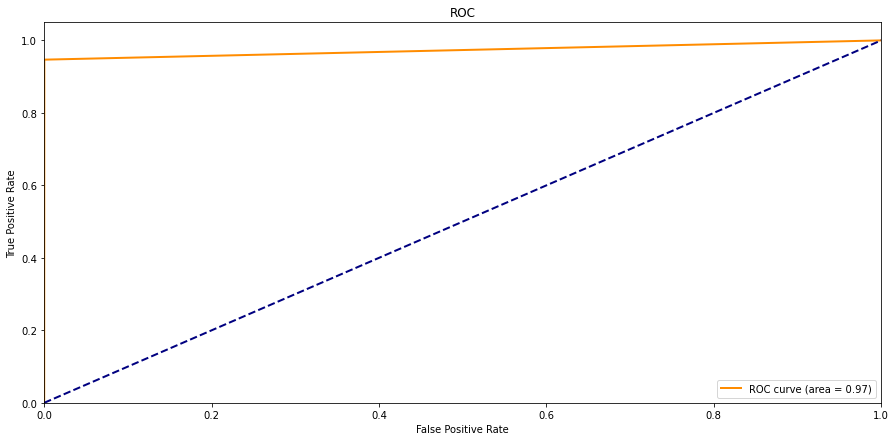

In [43]:
# Compute ROC curve and ROC area
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(training_preds['isFraud'], training_preds['Prediction'])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,7])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()